# Imports

In [2]:
import pickle
import pandas as pd
import numpy as np
from numpy import mean

# identification of ARIMA parameters
from statsmodels.tsa.stattools import acf, pacf # choose p and q

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context(context='talk')
plt.rcParams['figure.figsize'] = [16,8]

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *
from ADF import *
from arima_model import *

In [3]:
# df_train = pickle.load(open(r"..\data\flu_cases\df_cases_pre_COVID_train.pkl", "rb" ))
# df_test = pickle.load(open(r"..\data\flu_cases\df_cases_pre_COVID_test.pkl", "rb" ))

# df_train = df_train.set_index('Week Ending')
# df_test = df_test.set_index('Week Ending')

In [4]:
# df_train

In [5]:
def moving_average(data, dataset, train_test, window, forecast_weeks):

# dataset = 'Pre-COVID' or 'Full Dataset'
# train = 'Training' or 'Test'
   
    if forecast_weeks > 1:
        freq = str(forecast_weeks)+'W'
        data = data.set_index('Week Ending')
        data = data.resample(freq).mean()
   
    X = data['Total Cases']
    window = window
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()
   
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window, length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        # print(f'predicted={yhat}, actual={obs}')
   
    # plot
    plt.plot(test, color='blue', label='Actual Cases')
    plt.plot(predictions, color='red', label='Predicted Cases')
    plt.title(dataset + ' Cases Prediction'+' - '+str(forecast_weeks) +'-Week Forecast')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.legend()
    plt.show()
   
    if train_test == 'Training':
        MSE_train = round(mean_squared_error(X[window:], predictions),2)
        RMSE_train = round(mean_squared_error(X[window:], predictions, squared=False),2)
        MAE_train = round(mean_absolute_error(X[window:], predictions),2)
        R2_train = r2_score(X[window:], predictions)
        MSE_test = np.nan
        RMSE_test = np.nan
        MAE_test = np.nan
        R2_test = np.nan
    else:
        MSE_test = round(mean_squared_error(X[window:], predictions),2)
        RMSE_test = round(mean_squared_error(X[window:], predictions, squared=False),2)
        MAE_test = round(mean_absolute_error(X[window:], predictions),2)
        R2_test = r2_score(X[window:], predictions)
        MSE_train = np.nan
        RMSE_train = np.nan
        MAE_train = np.nan
        R2_train = np.nan
   
    results = []
   
    results.append(MSE_train)
    results.append(MSE_test)
    results.append(RMSE_train)
    results.append(RMSE_test)
    results.append(MAE_train)
    results.append(MAE_test)
    results.append(R2_train)
    results.append(R2_test)
   
    results.insert(0, train_test)
    results.insert(1, dataset)
    results.insert(2, forecast_weeks)
   
    results_matrix = pickle.load(open(r"..\data\results_matrix_moving_average.pkl", "rb" ))
   
    results_matrix = pd.concat([results_matrix.T, pd.Series(results, index=results_matrix.columns)], axis=1).T
   
    pickle.dump(results_matrix, open(r"..\data\results_matrix_moving_average.pkl", "wb" ))
   
    return results_matrix

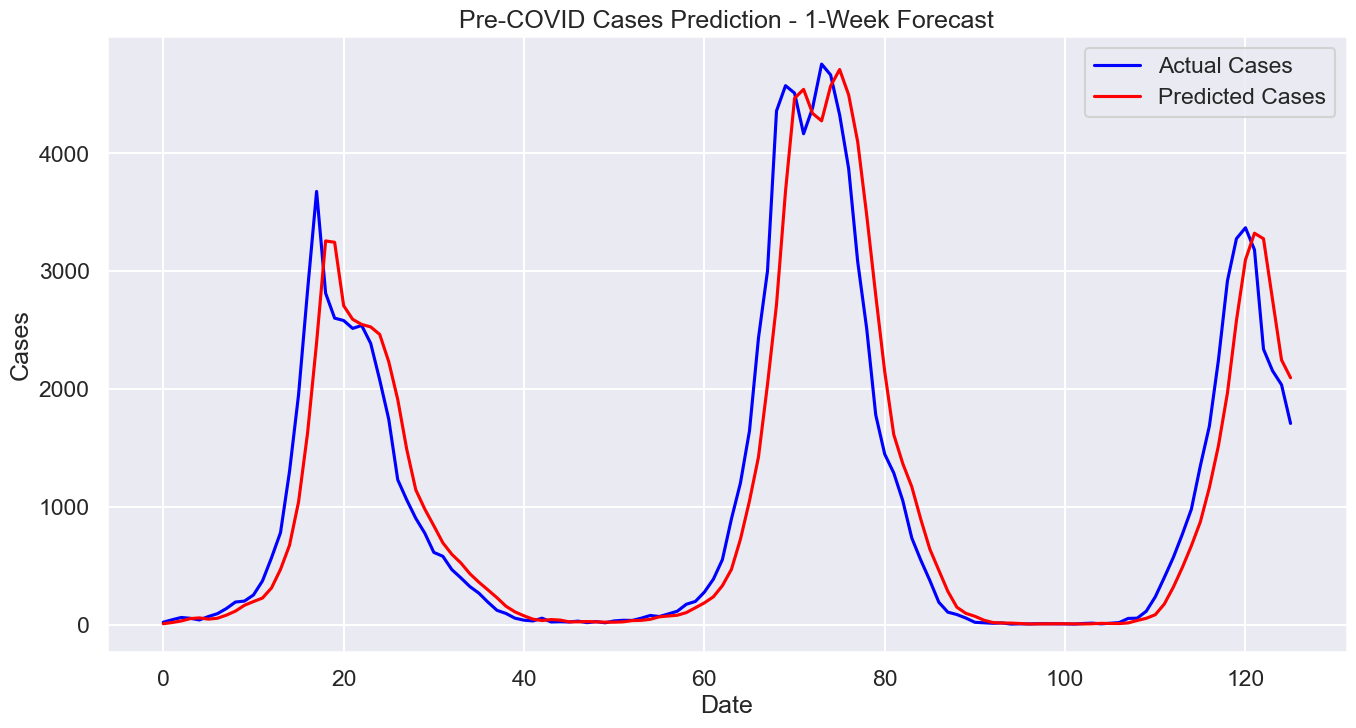

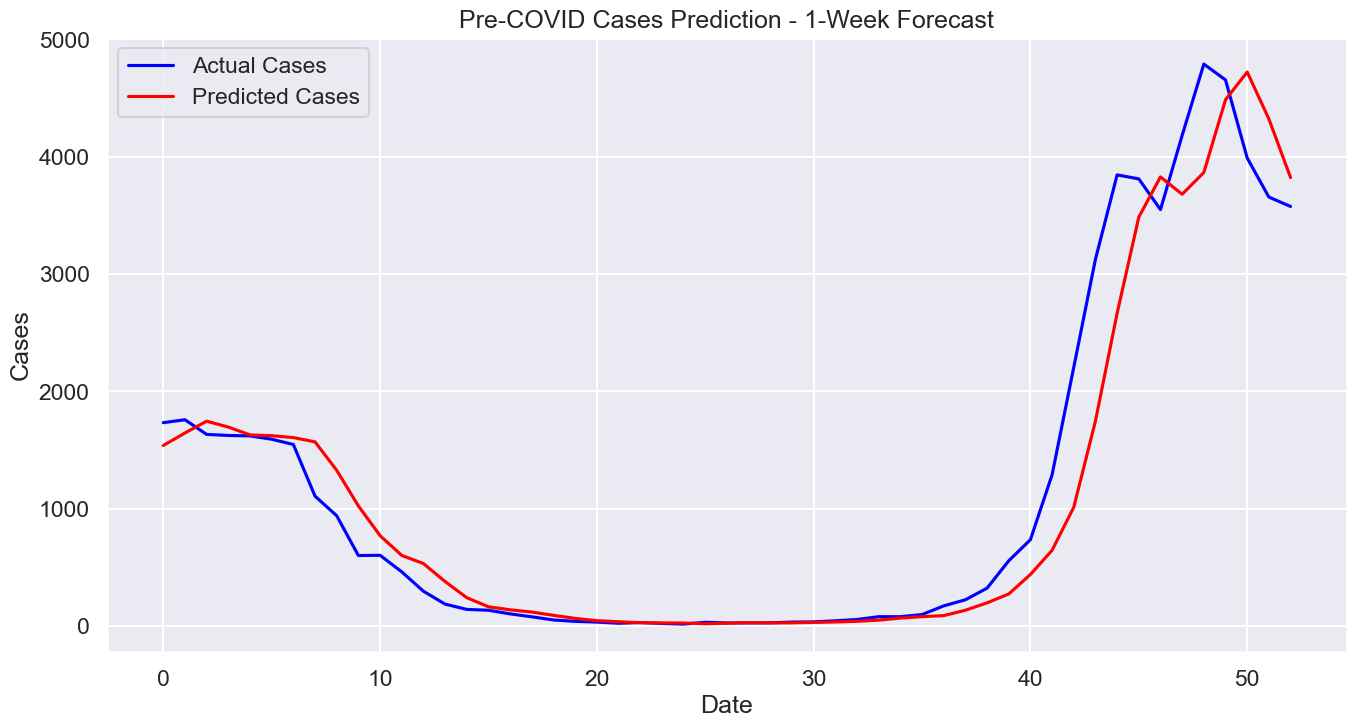

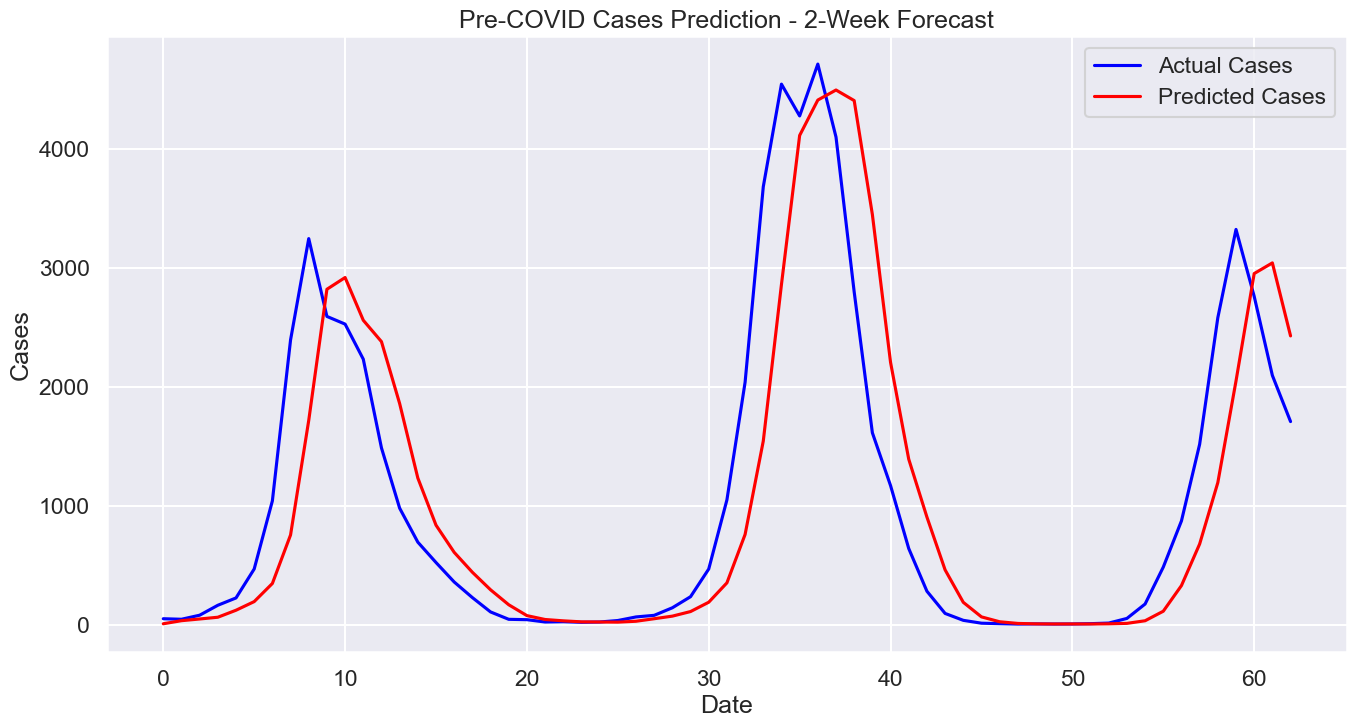

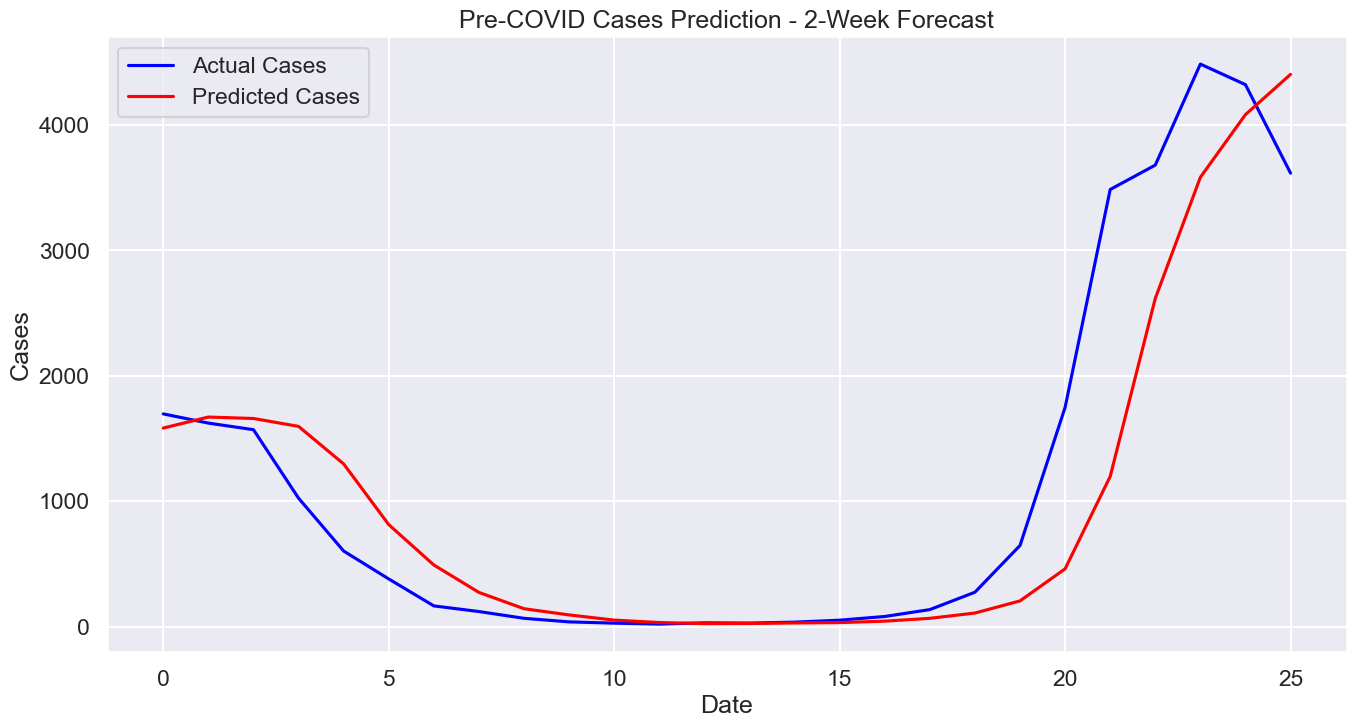

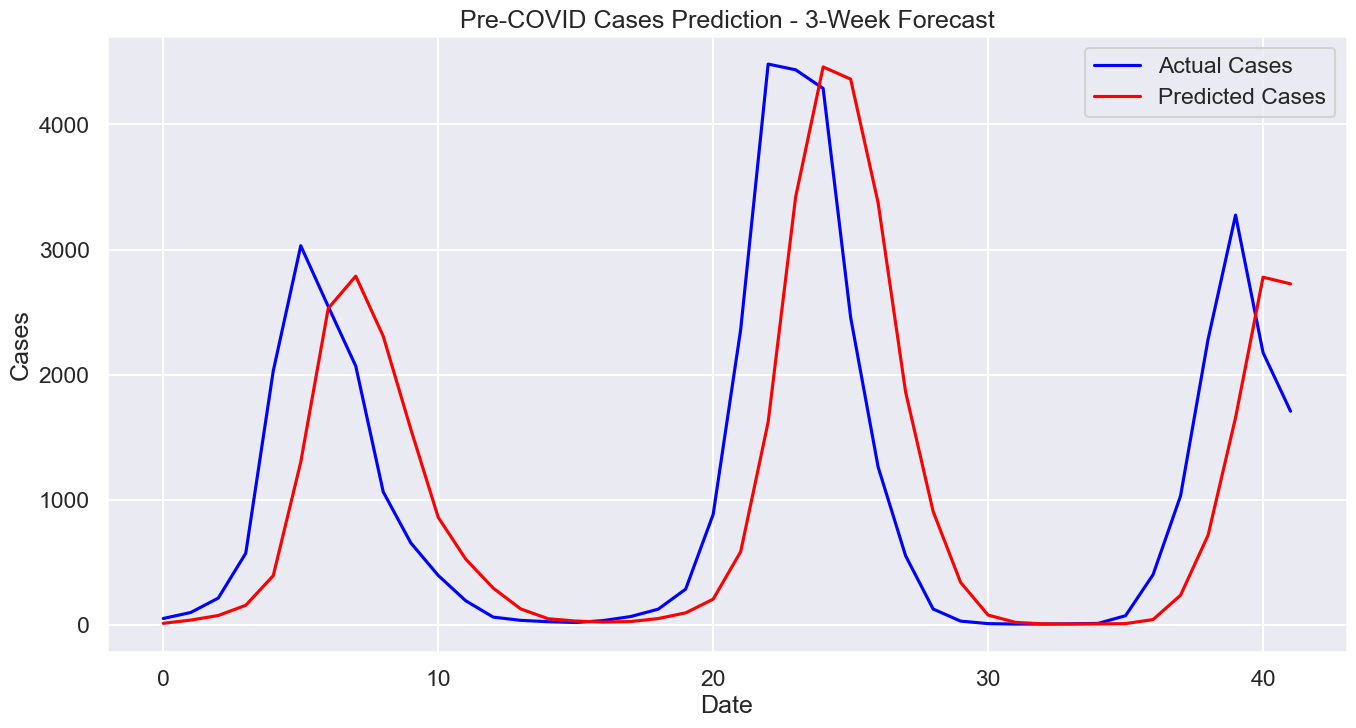

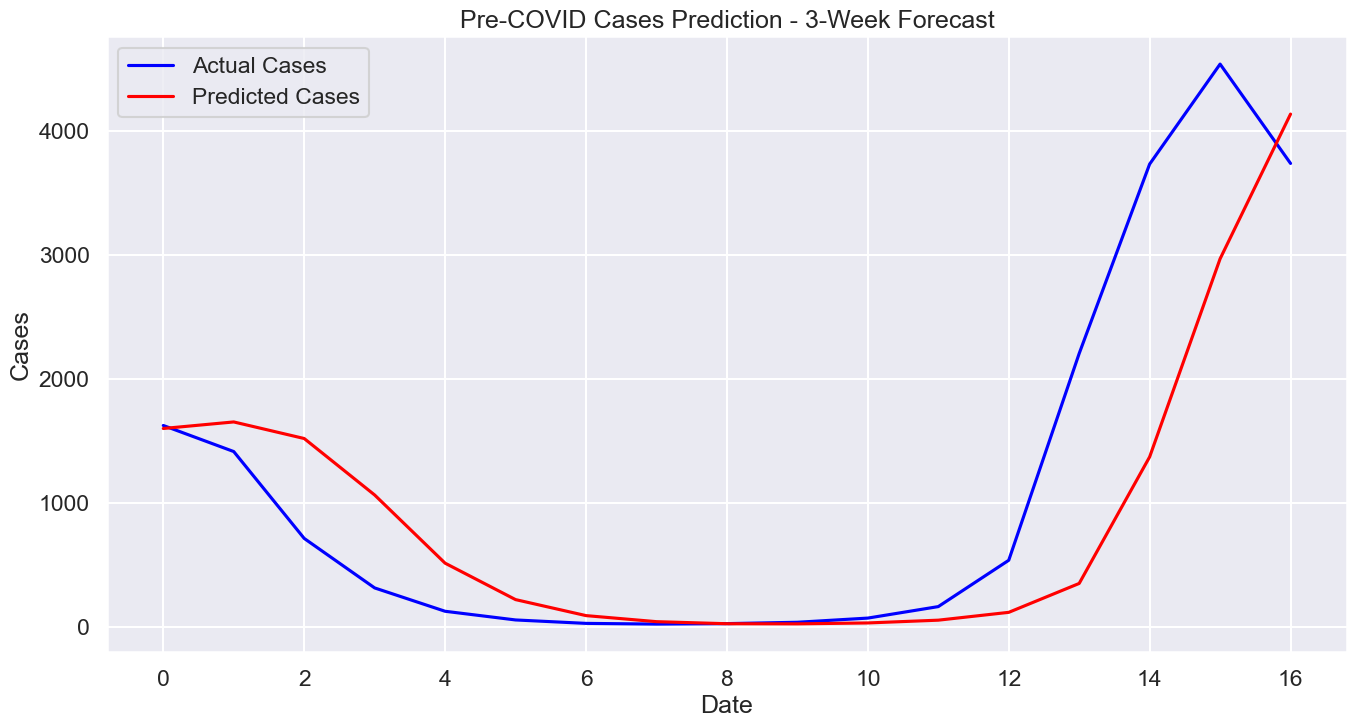

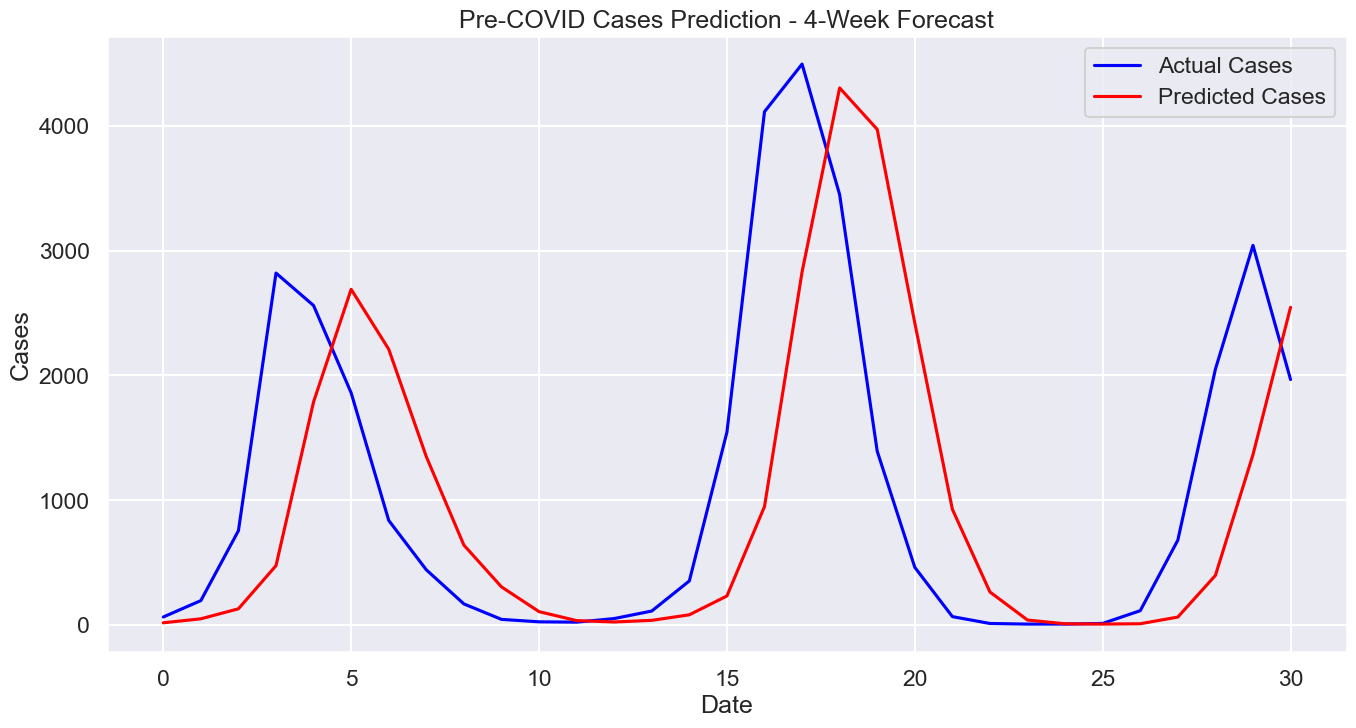

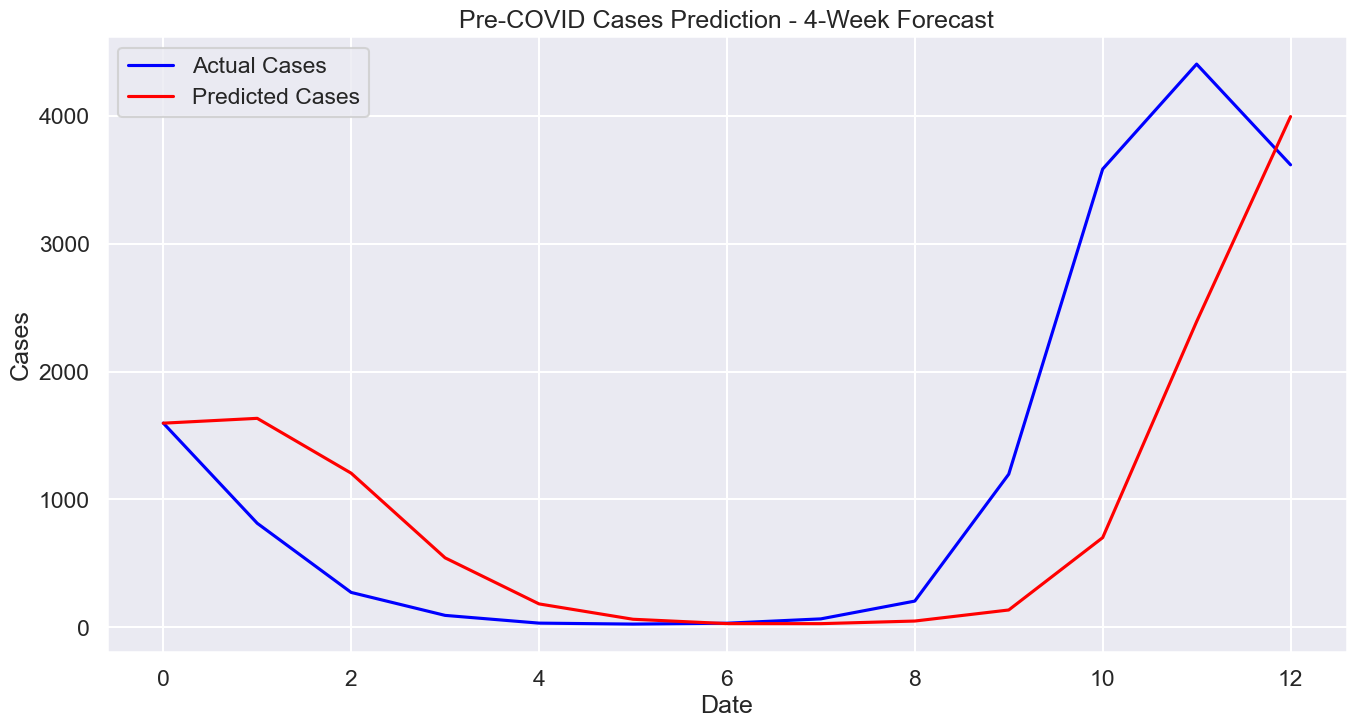

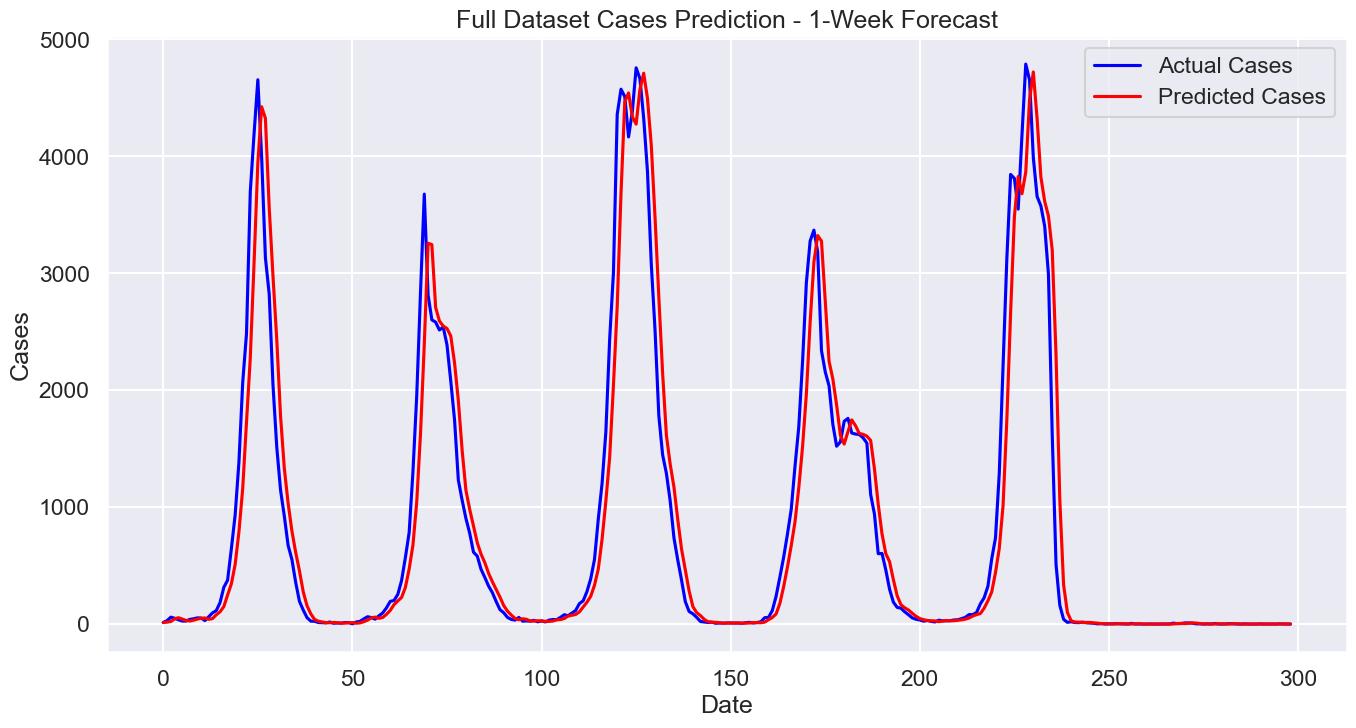

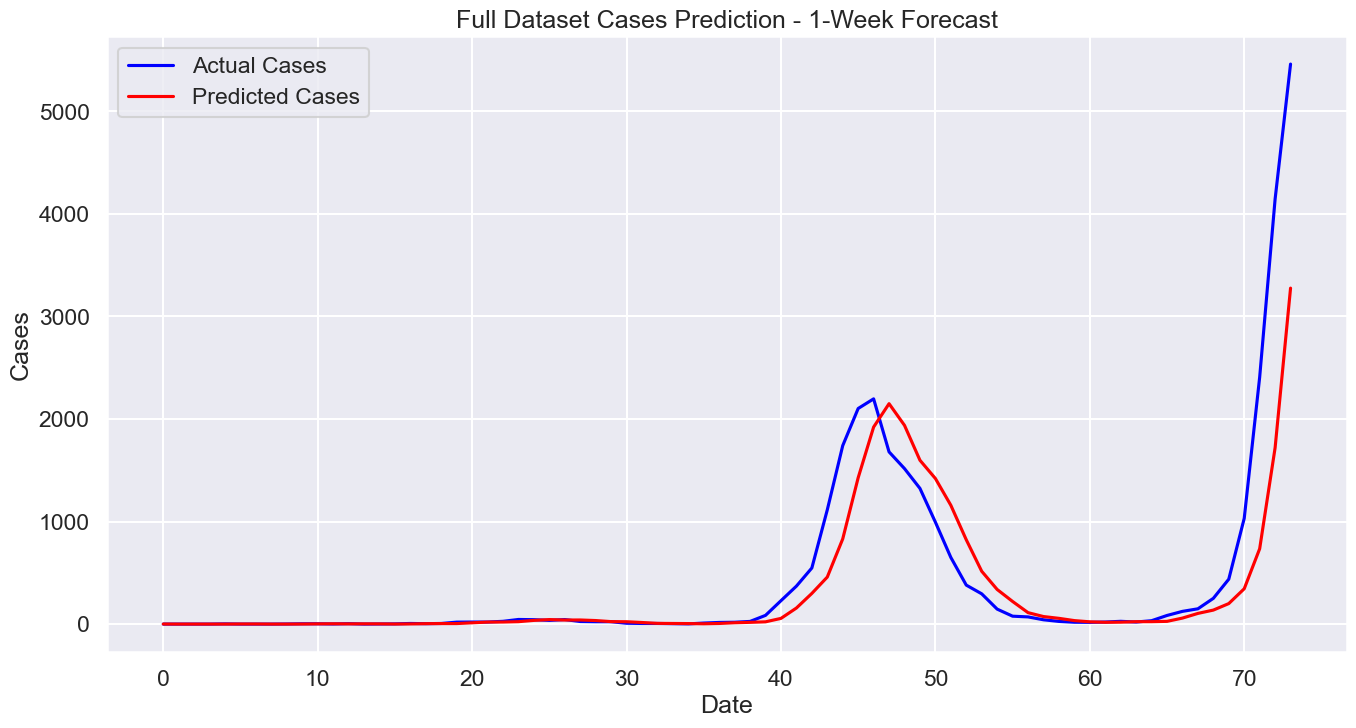

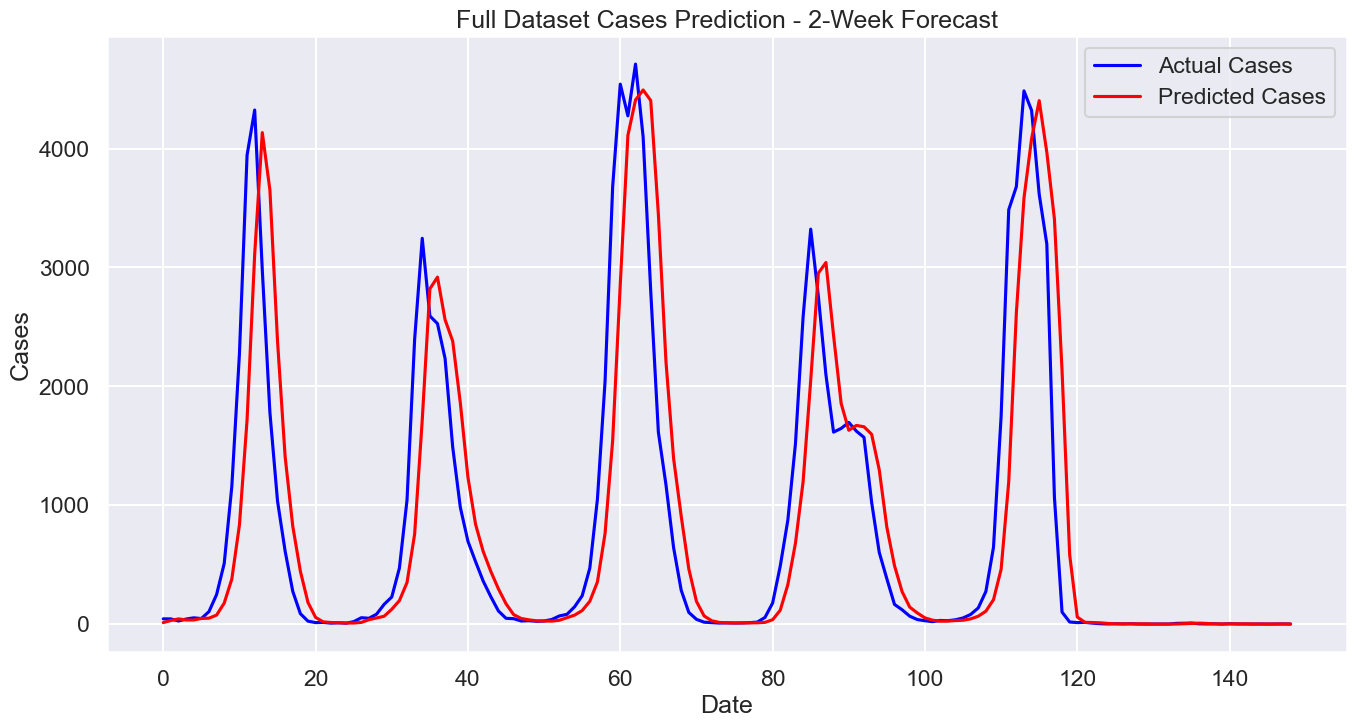

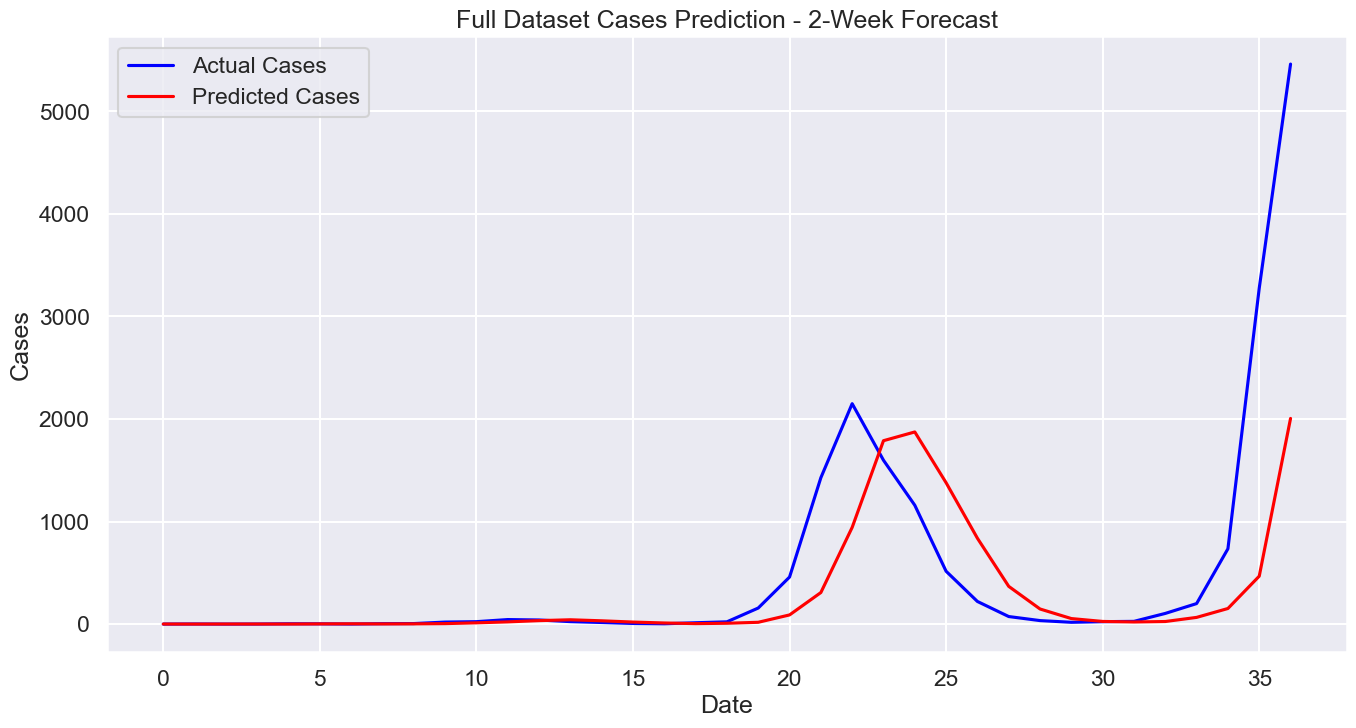

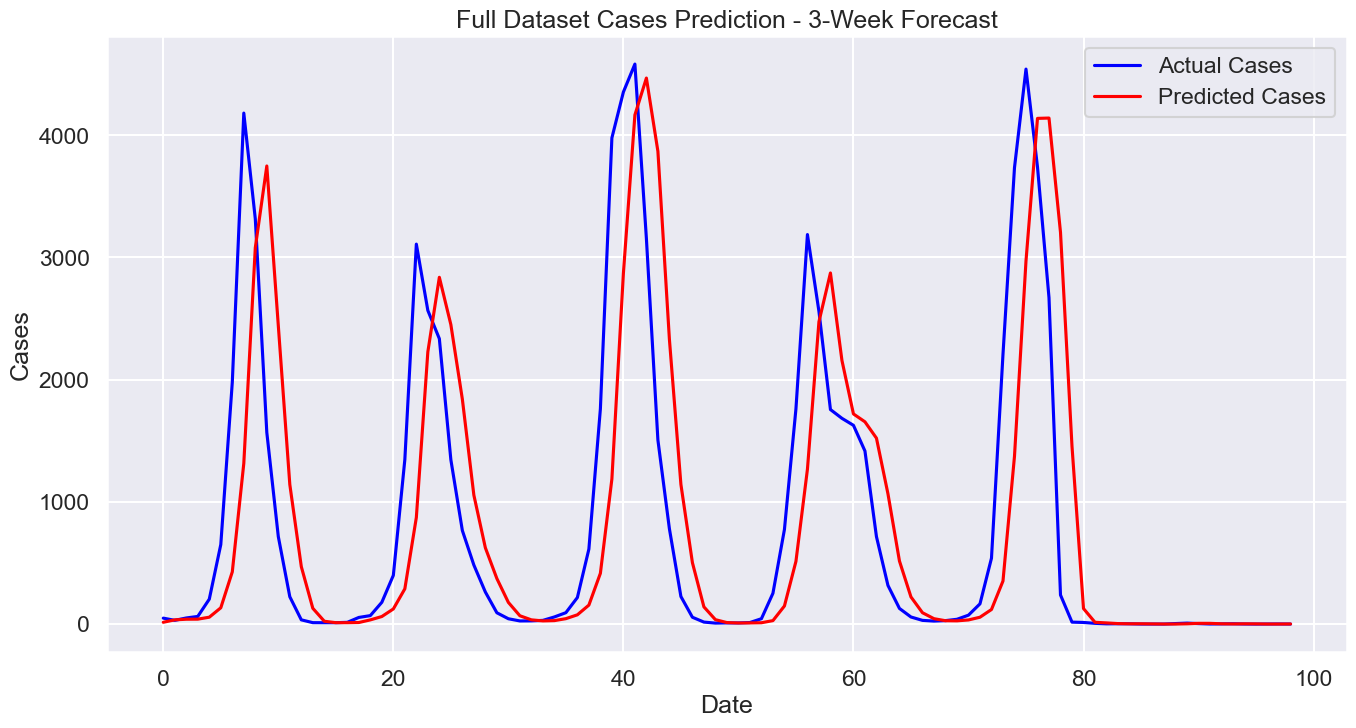

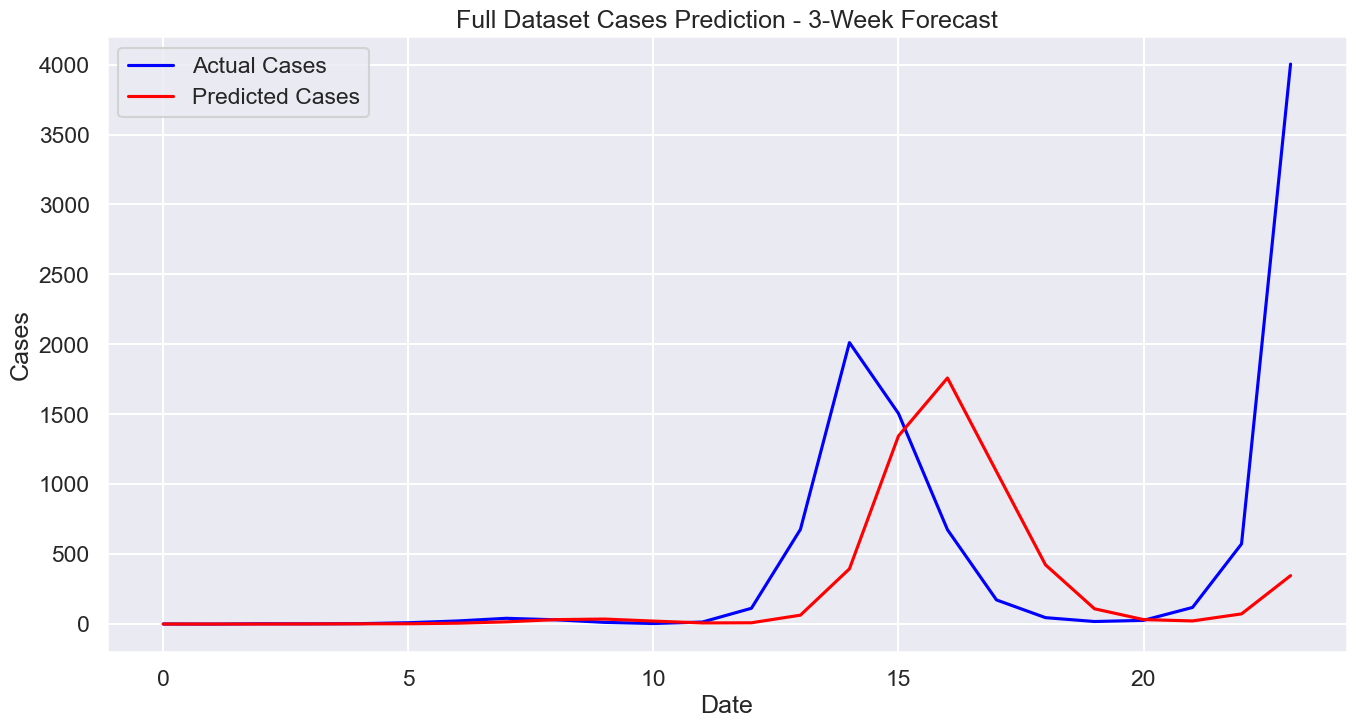

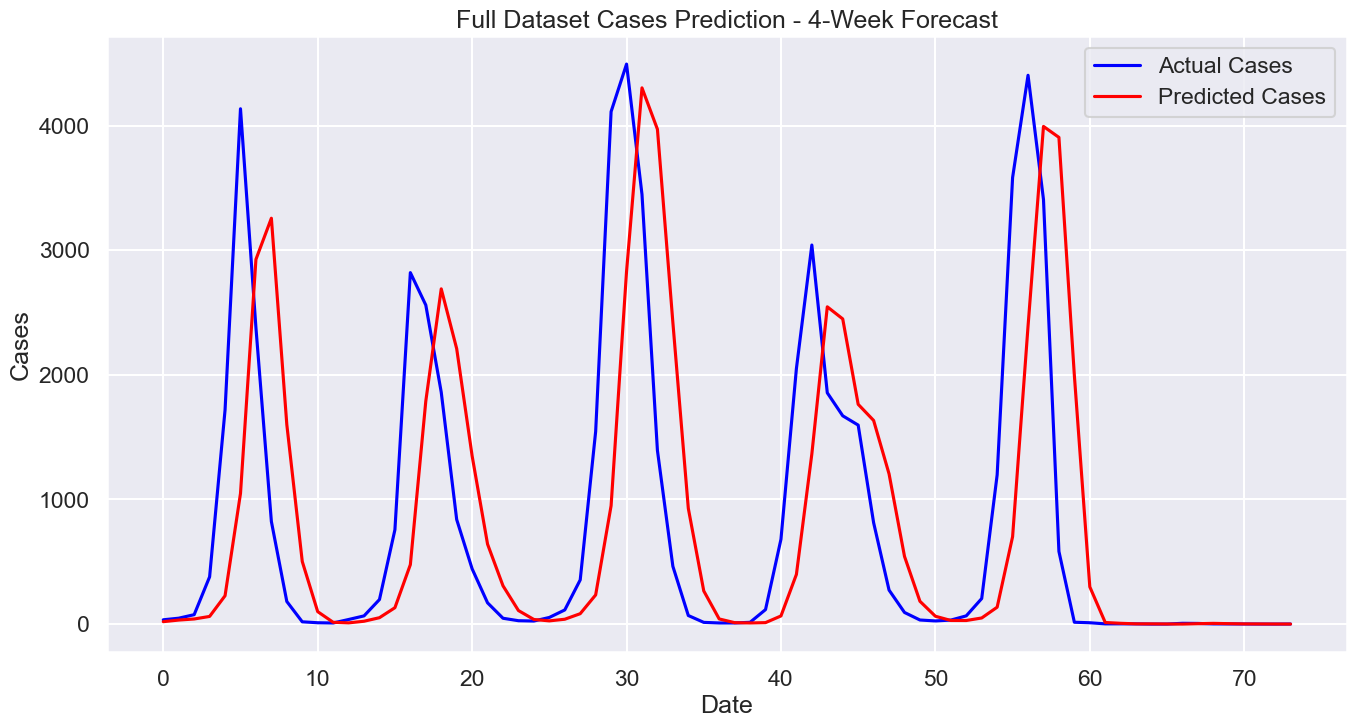

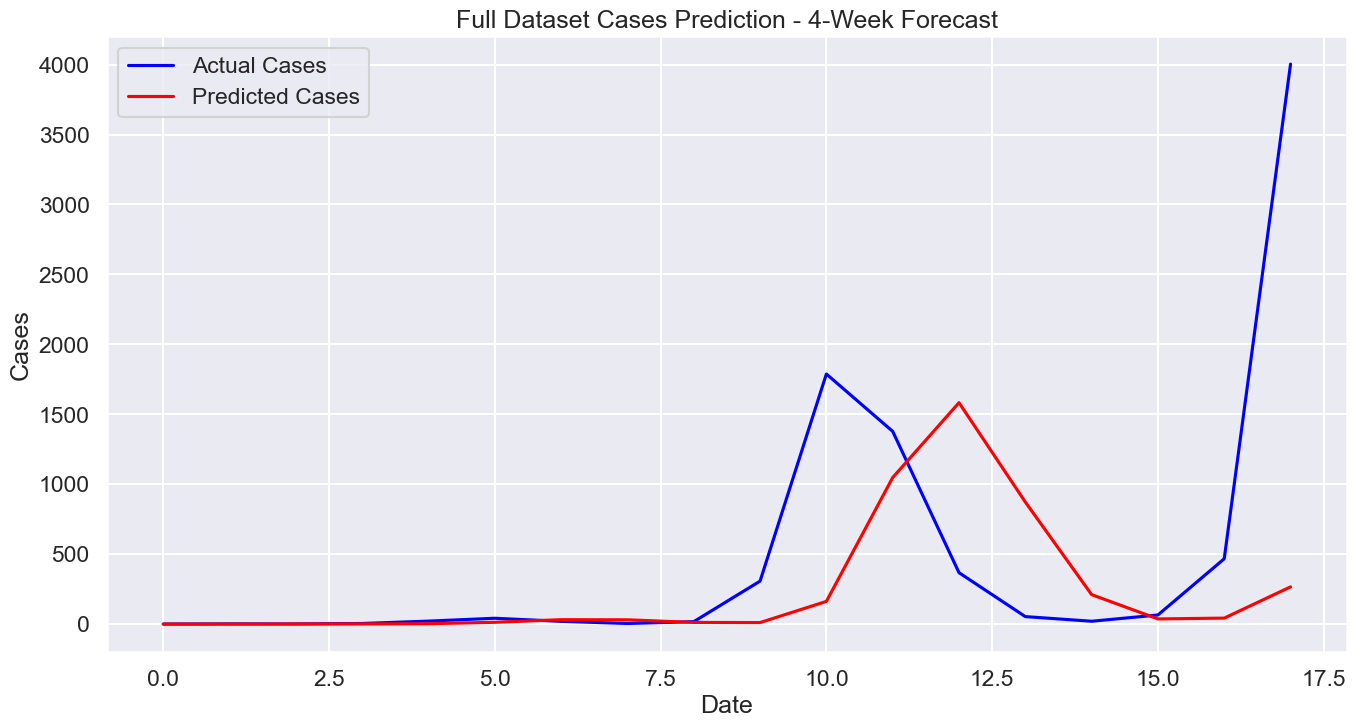

,Train_Test,Dataset,Weeks-ahead Forecast,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,Training,Pre-COVID,1,175577.26,NaN,419.02,NaN,256.5,NaN,0.903918,NaN
0,Test,Pre-COVID,1,NaN,159495.36,NaN,399.37,NaN,228.92,NaN,0.925804
0,Training,Pre-COVID,2,510554.13,NaN,714.53,NaN,459.16,NaN,0.715394,NaN
0,Test,Pre-COVID,2,NaN,419381.76,NaN,647.6,NaN,381.36,NaN,0.806007
0,Training,Pre-COVID,3,945743.08,NaN,972.49,NaN,652.02,NaN,0.465498,NaN
0,Test,Pre-COVID,3,NaN,781390.77,NaN,883.96,NaN,542.37,NaN,0.640439
0,Training,Pre-COVID,4,1387547.45,NaN,1177.94,NaN,823.88,NaN,0.206678,NaN
0,Test,Pre-COVID,4,NaN,1186120.55,NaN,1089.09,NaN,686.23,NaN,0.495074
0,Training,Full Dataset,1,161330.5,NaN,401.66,NaN,214.04,NaN,0.90202,NaN
0,Test,Full Dataset,1,NaN,231757.35,NaN,481.41,NaN,190.93,NaN,0.733419


In [6]:
df_train = pickle.load(open(r"..\data\flu_cases\df_cases_pre_COVID_train.pkl", "rb" ))
df_test = pickle.load(open(r"..\data\flu_cases\df_cases_pre_COVID_test.pkl", "rb" ))

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

for i in range(1,5):
    results_matrix = moving_average(data=df_train, dataset='Pre-COVID', train_test='Training', window=2, forecast_weeks=i)
    results_matrix = moving_average(data=df_test, dataset='Pre-COVID', train_test='Test', window=2, forecast_weeks=i)
results_matrix

df_train = pickle.load(open(r"..\data\flu_cases\df_cases_train.pkl", "rb" ))
df_test = pickle.load(open(r"..\data\flu_cases\df_cases_test.pkl", "rb" ))


df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
# 1, 2, 3, and 4 week predictions on full dataset

for i in range(1,5):
    results_matrix = moving_average(data=df_train, dataset='Full Dataset', train_test='Training', window=2, forecast_weeks=i)
    results_matrix = moving_average(data=df_test, dataset='Full Dataset', train_test='Test', window=2, forecast_weeks=i)
results_matrix

In [7]:
results_matrix[results_matrix['Weeks-ahead Forecast'] == 1]

,Train_Test,Dataset,Weeks-ahead Forecast,MSE_train,MSE_test,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
0,Training,Pre-COVID,1,175577.26,NaN,419.02,NaN,256.5,NaN,0.903918,NaN
0,Test,Pre-COVID,1,NaN,159495.36,NaN,399.37,NaN,228.92,NaN,0.925804
0,Training,Full Dataset,1,161330.5,NaN,401.66,NaN,214.04,NaN,0.90202,NaN
0,Test,Full Dataset,1,NaN,231757.35,NaN,481.41,NaN,190.93,NaN,0.733419
0,Training,Pre-COVID,1,175577.26,NaN,419.02,NaN,256.5,NaN,0.903918,NaN
0,Test,Pre-COVID,1,NaN,159495.36,NaN,399.37,NaN,228.92,NaN,0.925804
0,Training,Full Dataset,1,161330.5,NaN,401.66,NaN,214.04,NaN,0.90202,NaN
0,Test,Full Dataset,1,NaN,231757.35,NaN,481.41,NaN,190.93,NaN,0.733419


In [12]:
results_matrix = pd.DataFrame(columns=['Train_Test','Dataset','Weeks-ahead Forecast','MSE_train','MSE_test','RMSE_train','RMSE_test','MAE_train','MAE_test','R2_train','R2_test'])

pickle.dump(results_matrix, open(r"..\data\results_matrix_moving_average.pkl", "wb" ))